# GAMES ANALYSIS PROJECT

# Setup

In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the datasets.
# i have already downloaded the datasets from the following links:

# https://www.kaggle.com/datasets/fronkongames/steam-games-dataset/data
games_data = pd.read_csv(r'C:\!Projects\games_analysis\Data\games.psd')
games = games_data.copy()

# https://www.kaggle.com/datasets/hibrahimag1/top-1000-twitch-streamers-data-may-2024
twitch_streamers = pd.read_csv(r'C:\!Projects\games_analysis\Data\Twitch_streamers_data.csv')
streamers = twitch_streamers.copy()

# https://www.kaggle.com/datasets/rankirsh/evolution-of-top-games-on-twitch
twitch_stat = pd.read_csv(r'C:\!Projects\games_analysis\Data\twitch_games_data.csv', encoding='latin1')
twitch = twitch_stat.copy()

# EDA

## Quick view of the datasets

In [3]:
games.head()

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,Full audio languages,Reviews,Header image,Website,Support url,Support email,Windows,Mac,Linux,Metacritic score,Metacritic url,User score,Positive,Negative,Score rank,Achievements,Recommendations,Notes,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylized bowling game with an intergalactic twist. Player...,['English'],[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/20200/header.jpg?t=1640121033,http://www.galacticbowling.net,NaN,NaN,True,False,False,0,NaN,0,6,11,NaN,30,0,NaN,0,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,Partial Controller Support","Casual,Indie,Sports","Indie,Casual,Sports,Bowling","https://cdn.akamai.steamstatic.com/steam/apps/20200/0000005994.1920x1080.jpg?t=1640121033,https:...",http://cdn.akamai.steamstatic.com/steam/apps/256863704/movie_max.mp4?t=1638854607
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,"THE LAW!! Looks to be a showdown atop a train. This will be your last fight. Good luck, Train Ba...","['English', 'French', 'Italian', 'German', 'Spanish - Spain', 'Japanese', 'Portuguese - Brazil',...",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/655370/header.jpg?t=1617500526,http://trainbandit.com,NaN,support@rustymoyher.com,True,True,False,0,NaN,0,53,5,NaN,12,0,NaN,0,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controller support,Steam Leaderboards,Remote Play on Phone...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Score Attack,Minimalist,Comedy,Singleplayer,Fast-Pac...",https://cdn.akamai.steamstatic.com/steam/apps/655370/ss_16785eac54b29db688870e832f6997c89cd7804b...,http://cdn.akamai.steamstatic.com/steam/apps/256691108/movie_max.mp4?t=1506089586
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,"Jolt Project: The army now has a new robotics project, jolt. It's up to you to control it and en...","['English', 'Portuguese - Brazil']",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/1732930/header.jpg?t=1637149386,NaN,NaN,ramoncampiaof31@gmail.com,True,False,False,0,NaN,0,0,0,NaN,0,0,NaN,0,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/1732930/ss_09d67dec0607be7c4ead80289763033a47c86d8...,"http://cdn.akamai.steamstatic.com/steam/apps/256847488/movie_max.mp4?t=1635980739,http://cdn.aka..."
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler where players are propelled into weird and visceral...,"['English', 'French', 'Italian', 'German', 'Spanish - Spain', 'Japanese', 'Korean', 'Portuguese'...",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/1355720/header.jpg?t=1639875115,https://henosisgame.com/,https://henosisgame.com/,info@henosisgame.com,True,True,True,0,NaN,0,3,0,NaN,0,0,NaN,0,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzzle,Survival,Adventure,Linear,Singleplayer,Experime...",https://cdn.akamai.steamstatic.com/steam/apps/1355720/ss_20bbae2d9d5aaa2f043f372a551faabc0c47b0b...,http://cdn.akamai.steamstatic.com/steam/apps/256819153/movie_max.mp4?t=1611314333
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arranged a deal with a gangster. That’s how the protagon...,"['English', 'Spanish - Spain']",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/1139950/header.jpg?t=1595003825,https://www.unusual-games.com/home/,https://www.unusual-games.com/contact/,welistentoyou@unusual-games.com,True,True,False,0,NaN,0,50,8,NaN,17,0,"This Game may cont

In [4]:
streamers.head()

,RANK,NAME,LANGUAGE,TYPE,MOST_STREAMED_GAME,2ND_MOST_STREAMED_GAME,AVERAGE_STREAM_DURATION,FOLLOWERS_GAINED_PER_STREAM,AVG_VIEWERS_PER_STREAM,AVG_GAMES_PER_STREAM,TOTAL_TIME_STREAMED,TOTAL_FOLLOWERS,TOTAL_VIEWS,TOTAL_GAMES_STREAMED,ACTIVE_DAYS_PER_WEEK,MOST_ACTIVE_DAY,DAY_WITH_MOST_FOLLOWERS_GAINED
0,1,kaicenat,English,personality,Just Chatting,I'm Only Sleeping,7.6,18.405,15.852,2.3,4.698,10600000,9150000,194,3.6,Friday,Saturday
1,2,jynxzi,English,personality,Tom Clancy's Rainbow Six Siege,NBA 2K20,5.4,3.386,1.145,1.2,8.407,5760000,1950000,54,5.6,Tuesday,Sunday
2,3,caedrel,English,personality,League of Legends,I'm Only Sleeping,6.3,689.000,12.331,1.3,6.728,797000,14200000,111,2.8,Thursday,Sunday
3,4,caseoh_,English,personality,NBA 2K23,Just Chatting,4.6,7.185,0.000,3.6,2.554,4220000,53,385,6.2,Friday,Monday
4,5,ibai,Spanish,personality,Just Chatting,League of Legends,4.1,8.289,190.714,1.5,6.865,15600000,359000000,149,4.3,Wednesday,Saturday


In [5]:
twitch.head()

,Rank,Game,Month,Year,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
0,1,League of Legends,1,2016,94377226,1362044,530270,2903,129172,127021,1833,69.29
1,2,Counter-Strike: Global Offensive,1,2016,47832863,830105,372654,2197,120849,64378,1117,57.62
2,3,Dota 2,1,2016,45185893,433397,315083,1100,44074,60815,583,104.26
3,4,Hearthstone,1,2016,39936159,235903,131357,517,36170,53749,317,169.29
4,5,Call of Duty: Black Ops III,1,2016,16153057,1151578,71639,3620,214054,21740,1549,14.03


## Missings

In [6]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85103 entries, 0 to 85102
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AppID                       85103 non-null  int64  
 1   Name                        85097 non-null  object 
 2   Release date                85103 non-null  object 
 3   Estimated owners            85103 non-null  object 
 4   Peak CCU                    85103 non-null  int64  
 5   Required age                85103 non-null  int64  
 6   Price                       85103 non-null  float64
 7   DLC count                   85103 non-null  int64  
 8   About the game              81536 non-null  object 
 9   Supported languages         85103 non-null  object 
 10  Full audio languages        85103 non-null  object 
 11  Reviews                     9743 non-null   object 
 12  Header image                85103 non-null  object 
 13  Website                     394

In [7]:
games.isnull().sum()

AppID                             0
Name                              6
Release date                      0
Estimated owners                  0
Peak CCU                          0
Required age                      0
Price                             0
DLC count                         0
About the game                 3567
Supported languages               0
Full audio languages              0
Reviews                       75360
Header image                      0
Website                       45651
Support url                   43517
Support email                 13596
Windows                           0
Mac                               0
Linux                             0
Metacritic score                  0
Metacritic url                81191
User score                        0
Positive                          0
Negative                          0
Score rank                    85059
Achievements                      0
Recommendations                   0
Notes                       

In [8]:
# i will drop columns with 50% more missings
missing_percentage = games.isnull().mean()*100
N = 50
columns_to_keep = missing_percentage[missing_percentage<=N].index
games = games[columns_to_keep]

In [9]:
games.isnull().mean()*100

AppID                          0.000000
Name                           0.007050
Release date                   0.000000
Estimated owners               0.000000
Peak CCU                       0.000000
Required age                   0.000000
Price                          0.000000
DLC count                      0.000000
About the game                 4.191392
Supported languages            0.000000
Full audio languages           0.000000
Header image                   0.000000
Support email                 15.975935
Windows                        0.000000
Mac                            0.000000
Linux                          0.000000
Metacritic score               0.000000
User score                     0.000000
Positive                       0.000000
Negative                       0.000000
Achievements                   0.000000
Recommendations                0.000000
Average playtime forever       0.000000
Average playtime two weeks     0.000000
Median playtime forever        0.000000


In [10]:
games.loc[games.Name.isnull()]

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,Full audio languages,Header image,Support email,Windows,Mac,Linux,Metacritic score,User score,Positive,Negative,Achievements,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
25222,396420,NaN,"Nov 1, 2016",0 - 0,0,0,0.00,0,Spookeningは3Dの恐怖ゲームで、あなたは毎夜に死んでゴーストとして復活します。 村人を怖がらせます。深夜に彼らの魂の力を取って復活します！ Clifftownは幽霊がいる。無知な村人...,[],[],https://cdn.akamai.steamstatic.com/steam/apps/396420/header.jpg?t=1545256825,NaN,True,False,False,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72038,1116910,NaN,"Sep 25, 2019",0 - 0,0,0,6.99,0,NaN,[],[],https://cdn.akamai.steamstatic.com/steam/apps/1116910/header.jpg?t=1681222346,NaN,True,False,False,0,0,0,0,0,0,0,0,0,0,NaN,NaN,"Single-player,Steam Cloud","Action,Adventure,Casual,Indie,RPG,Simulation,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/1116910/ss_9ab3272d3ddc769df29113bd7dfbd5e6067f5a6...,http://cdn.akamai.steamstatic.com/steam/apps/256762655/movie_max.mp4?t=1569054798
77215,1365520,NaN,"Aug 30, 2020",0 - 0,0,0,0.00,0,NaN,"['English', 'French', 'Italian', 'German', 'Spanish - Spain', 'Bulgarian', 'Japanese', 'Korean',...",[],https://cdn.akamai.steamstatic.com/steam/apps/1365520/header.jpg?t=1680505866,NaN,True,False,False,0,0,0,0,0,0,0,0,0,0,NaN,NaN,"Single-player,Steam Cloud",Early Access,NaN,NaN,NaN
77487,1080790,NaN,"Jul 12, 2019",0 - 0,0,0,0.00,0,NaN,['English'],[],https://cdn.akamai.steamstatic.com/steam/apps/1080790/header.jpg?t=1642609073,NaN,True,False,False,0,0,0,0,20,0,0,0,0,0,NaN,NaN,NaN,"Adventure,Casual,Free to Play,Indie,RPG",NaN,NaN,NaN
77561,1256960,NaN,"Mar 11, 2020",0 - 20000,0,0,0.00,0,NaN,['English'],['English'],https://cdn.akamai.steamstatic.com/steam/apps/1256960/header.jpg?t=1623161831,NaN,True,False,False,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77721,1172120,NaN,"Jan 23, 2020",0 - 0,0,0,0.00,0,NaN,['English'],[],https://cdn.akamai.steamstatic.com/steam/apps/1172120/header.jpg?t=1623161594,NaN,True,True,True,0,0,0,0,0,0,0,0,0,0,NaN,NaN,Single-player,"Action,Indie,Simulation",NaN,NaN,NaN


In [11]:
# i will drop the rows witn nan in the name column
print(games.shape)
games = games.dropna(subset=['Name'])
print(games.shape)

(85103, 33)
(85097, 33)


In [12]:
games.isnull().sum()

AppID                             0
Name                              0
Release date                      0
Estimated owners                  0
Peak CCU                          0
Required age                      0
Price                             0
DLC count                         0
About the game                 3562
Supported languages               0
Full audio languages              0
Header image                      0
Support email                 13590
Windows                           0
Mac                               0
Linux                             0
Metacritic score                  0
User score                        0
Positive                          0
Negative                          0
Achievements                      0
Recommendations                   0
Average playtime forever          0
Average playtime two weeks        0
Median playtime forever           0
Median playtime two weeks         0
Developers                     3581
Publishers                  

In [13]:
games.loc[games['About the game'].isnull()]

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,Full audio languages,Header image,Support email,Windows,Mac,Linux,Metacritic score,User score,Positive,Negative,Achievements,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
105,1943590,溪风谷之战 Playtest,"Mar 24, 2022",0 - 0,0,0,0.0,0,NaN,[],[],https://cdn.akamai.steamstatic.com/steam/apps/1943590/header.jpg?t=1648141161,NaN,True,False,False,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
180,1966960,Burial Stone Playtest,"Apr 13, 2022",0 - 0,0,0,0.0,0,NaN,[],[],https://cdn.akamai.steamstatic.com/steam/apps/1966960/header.jpg?t=1649915692,NaN,True,False,False,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,https://cdn.akamai.steamstatic.com/steam/apps/1966960/ss_d10986106fc6fd4c01aae3a57b31e0e89f09ccc...,NaN
214,1688630,Emperial Knights Playtest,"Nov 14, 2021",0 - 0,0,0,0.0,0,NaN,[],[],https://cdn.akamai.steamstatic.com/steam/apps/1688630/header.jpg?t=1636889391,NaN,True,False,False,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,https://cdn.akamai.steamstatic.com/steam/apps/1688630/ss_eb63004645b333cca26fafc582f4009194a060c...,NaN
220,1478660,Slotracers VR Playtest,"Dec 17, 2020",0 - 0,0,0,0.0,0,NaN,[],[],https://cdn.akamai.steamstatic.com/steam/apps/1478660/header.jpg?t=1608226854,NaN,True,False,False,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
291,1613340,Pirates of the Asteroid Belt Playtest,"Apr 23, 2021",0 - 0,0,0,0.0,0,NaN,[],[],https://cdn.akamai.steamstatic.com/steam/apps/1613340/header.jpg?t=1619200843,NaN,True,False,False,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85003,2606520,Elysium Playtest,"Jan 4, 2024",0 - 0,0,0,0.0,0,NaN,[],[],https://cdn.akamai.steamstatic.com/steam/apps/2606520/header.jpg?t=1704376899,NaN,True,False,False,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85040,2644780,Dastaan Playtest,"Jan 2, 2024",0 - 0,0,0,0.0,0,NaN,[],[],https://cdn.akamai.steamstatic.com/steam/apps/2644780/header.jpg?t=1704192242,NaN,True,False,False,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85062,2454850,SlipBreak™,"Jan 4, 2024",0 - 0,0,18,30.0,0,NaN,['English'],['English'],https://cdn.akamai.steamstatic.com/steam/apps/2454850/header.jpg?t=1704366610,conceptyphoon@outlook.com,True,False,False,0,0,0,0,1,0,0,0,0,0,Typhoon,Typhoon,Single-player,"Action,Adventure,Indie,Early Access",NaN,https://cdn.akamai.steamstatic.com/steam/apps/2454850/ss_98f76d89f95557fce9272a6b0c5c69bf935336e...,"http://cdn.akamai.steamstatic.com/steam/apps/256952233/movie_max.mp4?t=1703220939,http://cdn.aka..."
85088,2747170,Backpack Battles Playtest,"Jan 3, 2024",0 - 0,0,0,0.0,0,NaN,[],[],https://cdn.akamai.steamstatic.com/steam/apps/2747170/header.jpg?t=1704286886,NaN,True,False,False,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# i see that most of this games are 'playtest' so i will add this description
games.loc[games.Name.str.contains('Playtest'),'About the game'] = "This is a playtest game is the process by which a game designer tests a new game for bugs and design flaws before releasing it to market."

In [15]:
games.isnull().mean()

AppID                         0.000000
Name                          0.000000
Release date                  0.000000
Estimated owners              0.000000
Peak CCU                      0.000000
Required age                  0.000000
Price                         0.000000
DLC count                     0.000000
About the game                0.002209
Supported languages           0.000000
Full audio languages          0.000000
Header image                  0.000000
Support email                 0.159700
Windows                       0.000000
Mac                           0.000000
Linux                         0.000000
Metacritic score              0.000000
User score                    0.000000
Positive                      0.000000
Negative                      0.000000
Achievements                  0.000000
Recommendations               0.000000
Average playtime forever      0.000000
Average playtime two weeks    0.000000
Median playtime forever       0.000000
Median playtime two weeks

In [16]:
games['About the game'].fillna('The Game does not have a description', inplace=True)

In [17]:
games.isnull().sum()

AppID                             0
Name                              0
Release date                      0
Estimated owners                  0
Peak CCU                          0
Required age                      0
Price                             0
DLC count                         0
About the game                    0
Supported languages               0
Full audio languages              0
Header image                      0
Support email                 13590
Windows                           0
Mac                               0
Linux                             0
Metacritic score                  0
User score                        0
Positive                          0
Negative                          0
Achievements                      0
Recommendations                   0
Average playtime forever          0
Average playtime two weeks        0
Median playtime forever           0
Median playtime two weeks         0
Developers                     3581
Publishers                  

In [18]:
games.loc[games['Support email'].isnull()]

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,Full audio languages,Header image,Support email,Windows,Mac,Linux,Metacritic score,User score,Positive,Negative,Achievements,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylized bowling game with an intergalactic twist. Player...,['English'],[],https://cdn.akamai.steamstatic.com/steam/apps/20200/header.jpg?t=1640121033,NaN,True,False,False,0,0,6,11,30,0,0,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,Partial Controller Support","Casual,Indie,Sports","Indie,Casual,Sports,Bowling","https://cdn.akamai.steamstatic.com/steam/apps/20200/0000005994.1920x1080.jpg?t=1640121033,https:...",http://cdn.akamai.steamstatic.com/steam/apps/256863704/movie_max.mp4?t=1638854607
15,22670,Alien Breed 3: Descent,"Nov 17, 2010",200000 - 500000,3,0,9.99,0,"Alien Breed™ 3: Descent is the final explosive chapter in the Alien Breed™ series, and is a scie...","['English', 'French', 'German', 'Italian', 'Japanese', 'Spanish - Spain']",[],https://cdn.akamai.steamstatic.com/steam/apps/22670/header.jpg?t=1655730869,NaN,True,False,False,64,0,349,134,13,285,44,0,24,0,Team17 Digital Ltd,Team17 Digital Ltd,"Single-player,Multi-player,Co-op,Steam Achievements,Partial Controller Support,Stats,Steam Leade...",Action,"Action,Shooter,Sci-fi,Aliens,Third Person,Isometric,Top-Down Shooter,Co-op,Twin Stick Shooter,To...",https://cdn.akamai.steamstatic.com/steam/apps/22670/ss_12bdbc7f444c7e99c2132f05d1945b9036e999cb....,NaN
18,1097880,Super Naughty Maid 2,"Jun 20, 2019",0 - 20000,4,0,9.59,2,"Story Leona, your cute and lewd maid is back for more in Super Naughty Maid 2! With her services...","['English', 'Traditional Chinese']",[],https://cdn.akamai.steamstatic.com/steam/apps/1097880/header.jpg?t=1634585855,NaN,True,False,False,0,0,0,0,0,1144,34,0,30,0,KENZsoft,Denpasoft,"Single-player,Steam Trading Cards","Casual,Indie",NaN,https://cdn.akamai.steamstatic.com/steam/apps/1097880/ss_25abbd25794dbc448b55dc22c7d0b0f21a53be0...,http://cdn.akamai.steamstatic.com/steam/apps/256752455/movie_max.mp4?t=1559937666
22,434030,Aerofly FS 2 Flight Simulator,"Nov 20, 2017",100000 - 200000,19,0,37.49,23,Aerofly FS 2 lets you explore the world of flying in a quality never seen before. Fly a large se...,"['English', 'German', 'French']","['English', 'German', 'French']",https://cdn.akamai.steamstatic.com/steam/apps/434030/header.jpg?t=1611007152,NaN,True,True,True,0,0,1490,408,0,1831,127,0,127,0,IPACS,IPACS,"Single-player,Partial Controller Support","Action,Indie,Racing,Simulation","Flight,Simulation,VR,Racing,Physics,Open World,Realistic,Education,Exploration,Jet,3D Vision,Rel...",https://cdn.akamai.steamstatic.com/steam/apps/434030/ss_888dfca608d7f02013f17d4ae00426353e88348c...,http://cdn.akamai.steamstatic.com/steam/apps/256664157/movie_max.mp4?t=1463158928
23,810740,Turtle Lu,"Mar 22, 2018",20000 - 50000,0,0,2.99,0,"Turtle Lu Turtle Lu is an old-school Action-Adventure game, Explore immense 2D Zones. Day after ...",['English'],[],https://cdn.akamai.steamstatic.com/steam/apps/810740/header.jpg?t=1564767072,NaN,True,False,False,0,0,4,10,0,0,0,0,0,0,Falco Software,NaN,Single-player,"Action,Adventure,Casual,Indie","Action,Adventure,Indie,Casual,Platformer,Arcade,2D,Retro,Minimalist,Atmospheric,Singleplayer",https://cdn.akamai.steamstatic.com/steam/apps/810740/ss_755679f9ec63dc336bf420a854971910cc308e9c...,http://cdn.akamai.steamstatic.com/steam/apps/256709262/movie_max.mp4?t=1520522175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85084,2508400,Mothers and Daughters,"Jan 2, 2024",0 - 20000,29,0,8.49,0,"In

In [19]:
# for others rows
games['Support email'] = games['Support email'].fillna('Unknown')
games['Developers'] = games['Developers'].fillna('Unknown')
games['Publishers'] = games['Publishers'].fillna('Unknown')

In [20]:
# for other missing i just will fill with 'NA'
games.isnull().sum()

AppID                             0
Name                              0
Release date                      0
Estimated owners                  0
Peak CCU                          0
Required age                      0
Price                             0
DLC count                         0
About the game                    0
Supported languages               0
Full audio languages              0
Header image                      0
Support email                     0
Windows                           0
Mac                               0
Linux                             0
Metacritic score                  0
User score                        0
Positive                          0
Negative                          0
Achievements                      0
Recommendations                   0
Average playtime forever          0
Average playtime two weeks        0
Median playtime forever           0
Median playtime two weeks         0
Developers                        0
Publishers                  

In [21]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85097 entries, 0 to 85102
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AppID                       85097 non-null  int64  
 1   Name                        85097 non-null  object 
 2   Release date                85097 non-null  object 
 3   Estimated owners            85097 non-null  object 
 4   Peak CCU                    85097 non-null  int64  
 5   Required age                85097 non-null  int64  
 6   Price                       85097 non-null  float64
 7   DLC count                   85097 non-null  int64  
 8   About the game              85097 non-null  object 
 9   Supported languages         85097 non-null  object 
 10  Full audio languages        85097 non-null  object 
 11  Header image                85097 non-null  object 
 12  Support email               85097 non-null  object 
 13  Windows                     85097 no

In [22]:
games.fillna('Unknown', inplace=True)

In [23]:
games.isnull().sum()

AppID                         0
Name                          0
Release date                  0
Estimated owners              0
Peak CCU                      0
Required age                  0
Price                         0
DLC count                     0
About the game                0
Supported languages           0
Full audio languages          0
Header image                  0
Support email                 0
Windows                       0
Mac                           0
Linux                         0
Metacritic score              0
User score                    0
Positive                      0
Negative                      0
Achievements                  0
Recommendations               0
Average playtime forever      0
Average playtime two weeks    0
Median playtime forever       0
Median playtime two weeks     0
Developers                    0
Publishers                    0
Categories                    0
Genres                        0
Tags                          0
Screensh

## Duplicated rows

In [24]:
games.duplicated().sum()

0

## Other manipulations

In [25]:
# changing date column type to dt
games['Release date'] = pd.to_datetime(games['Release date'], format='mixed')

In [26]:
games['Release date'].describe()

count                            85097
mean     2020-04-28 19:30:25.065513728
min                1997-06-30 00:00:00
25%                2018-07-01 00:00:00
50%                2020-12-18 00:00:00
75%                2022-08-18 00:00:00
max                2025-04-14 00:00:00
Name: Release date, dtype: object

In [27]:
# i will remove rows where data year = 2025
games = games[games['Release date'].dt.year != 2025]

In [28]:
# take only last 10 years
games = games[games['Release date'].dt.year >= 2013]

In [29]:
games['Release date'].describe()

count                            83418
mean     2020-07-12 01:06:16.235345408
min                2013-01-07 00:00:00
25%                2018-08-28 00:00:00
50%                2021-01-22 00:00:00
75%                2022-08-30 00:00:00
max                2024-03-06 00:00:00
Name: Release date, dtype: object

In [30]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83418 entries, 1 to 85102
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   AppID                       83418 non-null  int64         
 1   Name                        83418 non-null  object        
 2   Release date                83418 non-null  datetime64[ns]
 3   Estimated owners            83418 non-null  object        
 4   Peak CCU                    83418 non-null  int64         
 5   Required age                83418 non-null  int64         
 6   Price                       83418 non-null  float64       
 7   DLC count                   83418 non-null  int64         
 8   About the game              83418 non-null  object        
 9   Supported languages         83418 non-null  object        
 10  Full audio languages        83418 non-null  object        
 11  Header image                83418 non-null  object        


In [31]:
games.describe().T

,count,mean,min,25%,50%,75%,max,std
AppID,83418.0,1381475.63937,570.0,802262.5,1354575.0,1929665.0,2765800.0,677383.203899
Release date,83418,2020-07-12 01:06:16.235345408,2013-01-07 00:00:00,2018-08-28 00:00:00,2021-01-22 00:00:00,2022-08-30 00:00:00,2024-03-06 00:00:00,NaN
Peak CCU,83418.0,122.309573,0.0,0.0,0.0,1.0,872138.0,4626.857147
Required age,83418.0,0.27168,0.0,0.0,0.0,0.0,21.0,2.100973
Price,83418.0,7.161491,0.0,0.99,4.24,9.99,999.98,12.441225
DLC count,83418.0,0.534921,0.0,0.0,0.0,0.0,2366.0,13.797832
Metacritic score,83418.0,2.583591,0.0,0.0,0.0,0.0,97.0,13.57623
User score,83418.0,0.040627,0.0,0.0,0.0,0.0,100.0,1.809003
Positive,83418.0,766.276451,0.0,0.0,6.0,40.0,1477153.0,12819.097799
Negative,83418.0,141.778225,0.0,0.0,1.0,12.0,895978.0,3770.058819


In [32]:
count = games[games['Estimated owners'] == "0 - 0"]
count

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,Full audio languages,Header image,Support email,Windows,Mac,Linux,Metacritic score,User score,Positive,Negative,Achievements,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
53,1959480,Eternal Edge+ Prologue,2022-05-05,0 - 0,0,0,0.00,0,Eternal Edge + Prologue is a casual Action Adventure Role-Playing game. This prologue allows you...,"['English', 'French', 'German', 'Spanish - Spain', 'Japanese', 'Korean', 'Portuguese', 'Russian'...",[],https://cdn.akamai.steamstatic.com/steam/apps/1959480/header.jpg?t=1652885785,ignatios.software@ignatiosproductions.com,True,False,False,0,0,0,0,0,0,0,0,0,0,"Righteous Weasel Games,Ignatios Prouctions LLC","Sedoc LLC,GrabTheGames","Single-player,Full controller support","Action,Adventure,RPG",Unknown,https://cdn.akamai.steamstatic.com/steam/apps/1959480/ss_6457ae0999e8df8dcf2da7f406fa8b84a7d8dbc...,http://cdn.akamai.steamstatic.com/steam/apps/256880862/movie_max.mp4?t=1649427489
95,1662060,Moon Farming - Prologue,2022-01-06,0 - 0,0,0,0.00,0,"/ / Tired from the same farming games on Earth? Now, take on the role of a real modern farmer on...","['English', 'French', 'Italian', 'German', 'Spanish - Spain', 'Polish', 'Portuguese - Brazil', '...","['English', 'Simplified Chinese']",https://cdn.akamai.steamstatic.com/steam/apps/1662060/header.jpg?t=1647681594,info@simulam.com,True,False,False,0,0,0,0,7,0,0,0,0,0,SimulaM,PlayWay S.A,Single-player,"Adventure,Casual,Indie,Simulation,Strategy",Unknown,https://cdn.akamai.steamstatic.com/steam/apps/1662060/ss_5337fab5f216b83d08bb6928974b337d2536e99...,http://cdn.akamai.steamstatic.com/steam/apps/256855180/movie_max.mp4?t=1633790626
105,1943590,溪风谷之战 Playtest,2022-03-24,0 - 0,0,0,0.00,0,This is a playtest game is the process by which a game designer tests a new game for bugs and de...,[],[],https://cdn.akamai.steamstatic.com/steam/apps/1943590/header.jpg?t=1648141161,Unknown,True,False,False,0,0,0,0,0,0,0,0,0,0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
106,1995240,Deer Journey,2022-07-21,0 - 0,0,0,5.39,0,"Deer Journey is a third person walking simulator game, where you will be joining a fawn that has...","['English', 'Spanish - Spain', 'French', 'Italian', 'German', 'Simplified Chinese', 'Traditional...",[],https://cdn.akamai.steamstatic.com/steam/apps/1995240/header.jpg?t=1658397625,info@deerjourney.com,True,False,False,0,0,0,0,2,0,0,0,0,0,Pablo Picazo,Pablo Picazo,"Single-player,Full controller support","Adventure,Indie",Unknown,https://cdn.akamai.steamstatic.com/steam/apps/1995240/ss_7e037ee4a56f694bb9d4f1fe0d797b6024d38f1...,http://cdn.akamai.steamstatic.com/steam/apps/256889084/movie_max.mp4?t=1654327638
180,1966960,Burial Stone Playtest,2022-04-13,0 - 0,0,0,0.00,0,This is a playtest game is the process by which a game designer tests a new game for bugs and de...,[],[],https://cdn.akamai.steamstatic.com/steam/apps/1966960/header.jpg?t=1649915692,Unknown,True,False,False,0,0,0,0,0,0,0,0,0,0,Unknown,Unknown,Unknown,Unknown,Unknown,https://cdn.akamai.steamstatic.com/steam/apps/1966960/ss_d10986106fc6fd4c01aae3a57b31e0e89f09ccc...,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85098,2669080,Mannerheim's Saloon Car,2024-01-02,0 - 0,0,0,0.00,0,Marshal Mannerheim’s Saloon Car is the train carriage that was used by Carl Gustaf Emil Mannerhe...,"['English', 'Finnish']",['Finnish'],https://cdn.akamai.steamstatic.com/steam/apps/2669080/header.jpg?t=1704266050,xgsmikkeli@gmail.com,True,False,False,0,0,0,0,0,0,0,0,0,0,Xamk Game Studios,"Sodan ja rauhan keskus Muisti, Päämajamuseo","Single-player,Tracked Controller Support,VR Only","Adventure,Simulation",Unknown,https://cdn.akamai.steamstatic.com/steam/apps/2669080

In [33]:
# i will drop this rows aswell
print(games.shape)
# Filter games without sales, reviews or categories
games = games[~((games['Estimated owners'] == "0 - 0") | (games['Positive'] + games['Negative'] == 0) | (games['Categories'].str.len() == 0))]
print(games.shape)

(83418, 33)
(62293, 33)


In [34]:
games['Price'].describe()

count    62293.000000
mean         7.971494
std         11.123899
min          0.000000
25%          1.990000
50%          4.990000
75%          9.990000
max        999.000000
Name: Price, dtype: float64

In [35]:
games.groupby('Price').size().reset_index(name='Count')

,Price,Count
0,0.00,7470
1,0.35,1
2,0.44,1
3,0.49,541
4,0.50,42
...,...,...
492,199.99,20
493,249.00,1
494,269.99,1
495,299.90,1


In [36]:
print(games.shape)
games = games[games['Price'] < 900]
print(games.shape)

(62293, 33)
(62292, 33)


## Visualisations

<Axes: >

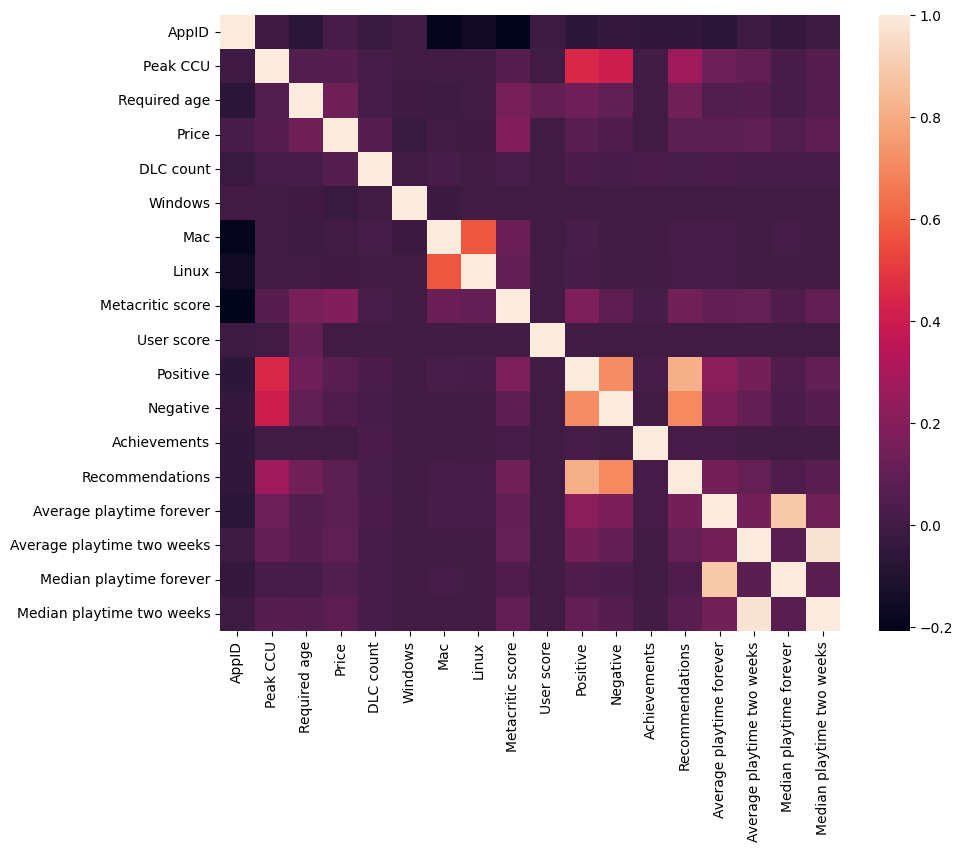

In [37]:
plt.figure(figsize=(10,8))
sns.heatmap(games.corr(numeric_only=True), annot=False)

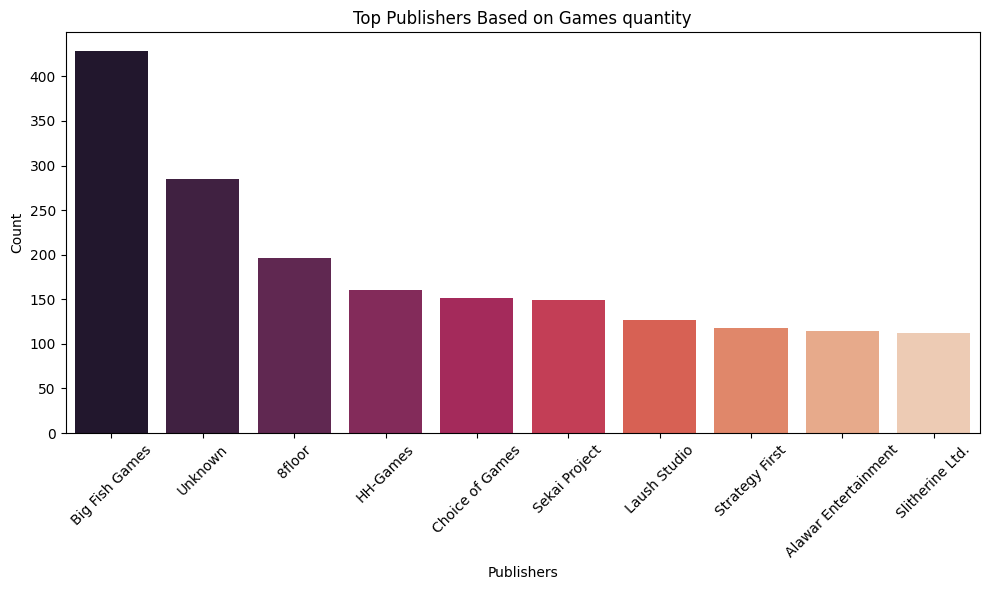

In [38]:
pb = games['Publishers'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x= pb.index, y= pb.values, palette='rocket')
plt.title("Top Publishers Based on Games quantity")
plt.xlabel("Publishers")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [39]:
metacrit = ~(games['Metacritic score']==0)

meta_filtered = games[metacrit]

meta_filtered.groupby('Name')[['Metacritic score']].mean().nlargest(10, 'Metacritic score')

,Metacritic score
Name,
Disco Elysium - The Final Cut,97.0
Persona 5 Royal,97.0
Grand Theft Auto V,96.0
BioShock Infinite,94.0
Divinity: Original Sin - Enhanced Edition,94.0
ELDEN RING,94.0
Mass Effect 2 (2010) Edition,94.0
Beat Saber,93.0
Divinity: Original Sin 2 - Definitive Edition,93.0


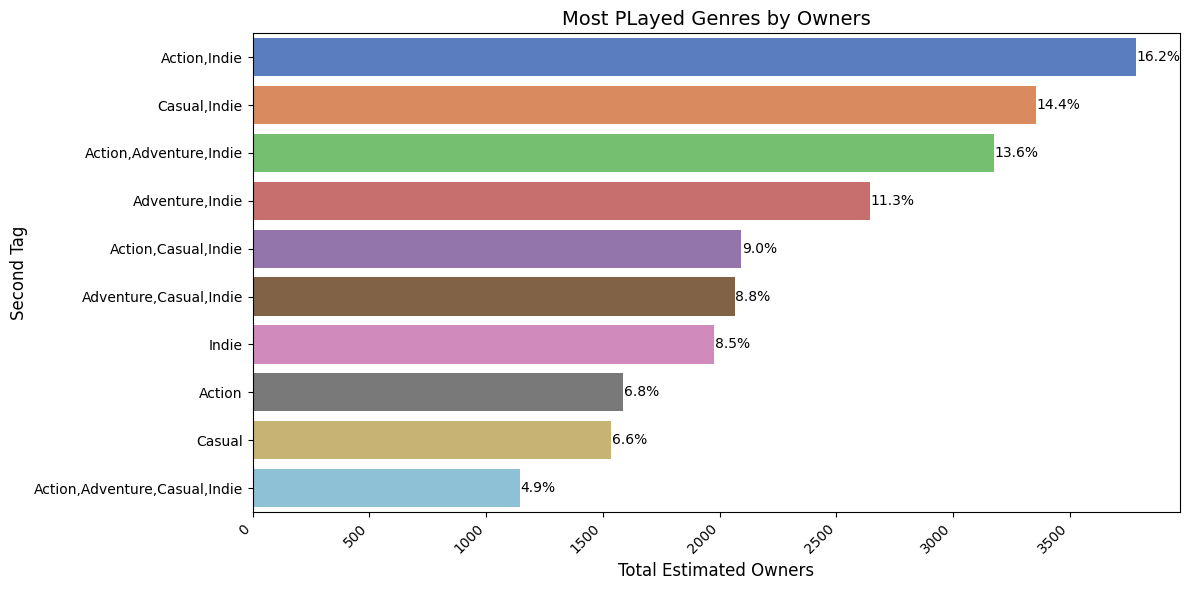

In [40]:
df1 = games.dropna(subset=['Tags'])
genres = df1['Genres'].value_counts().nlargest(10)

total_games = genres.sum()
percentages = [(count / total_games) * 100 for count in genres]

plt.figure(figsize=(12, 6))
barplot = sns.barplot(y=genres.index, x=genres.values, palette='muted', orient='h')

for i, (count, percentage) in enumerate(zip(genres, percentages)):
    barplot.text(genres.values[i] + 2, i, f'{percentage:.1f}%', ha='left', va='center', fontsize=10)

plt.xlabel("Total Estimated Owners", fontsize=12)
plt.ylabel("Second Tag", fontsize=12)
plt.title('Most PLayed Genres by Owners', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

# AI

In [41]:
# import pandas as pd
# import os
# from openai import OpenAI

# # Set your OpenAI API key
# openai_api_key = os.getenv('OPENAI_API_KEY')

# # Initialize the OpenAI client
# client = OpenAI(api_key=openai_api_key)

# # Assuming the DataFrame 'games' is already loaded
# # Select relevant columns for the prompt
# relevant_columns = ['Name', 'Peak CCU', 'Release date', 'Price', 'Genres', 'Tags']

# # Filter rows with user score equal to 0
# games_to_update = games[games['User score'] == 0][relevant_columns]

# # Initialize the new column
# games['User score_AI'] = games['User score']

# # Function to create prompt for AI
# def create_prompt(row):
#     prompt = f"Estimate a user score for a game with the following details:\n"
#     prompt += f"Name: {row['Name']}\n"
#     prompt += f"Peak Concurrent Users: {row['Peak CCU']}\n"
#     prompt += f"Release Date: {row['Release date']}\n"
#     prompt += f"Price: {row['Price']}\n"
#     prompt += f"Genres: {row['Genres']}\n"
#     prompt += f"Tags: {row['Tags']}\n"
#     prompt += "User Score:"
#     return prompt

# # Function to get AI-generated user score
# def get_user_score(prompt):
#     response = client.chat.completions.create(
#         model="gpt-3.5-turbo",
#         messages=[
#             {"role": "system", "content": "You are an assistant that estimates user scores for games based on their details."},
#             {"role": "user", "content": prompt}
#         ],
#         max_tokens=50,
#         n=1,
#         stop=None,
#         temperature=0.5,
#     )
    
#     score = response.choices[0].message.content.strip()
#     try:
#         score = float(score)
#     except ValueError:
#         score = 0  # Default to 0 if conversion fails
#     return score

# # Update user scores
# for index, row in games_to_update.iterrows():
#     prompt = create_prompt(row)
#     user_score = get_user_score(prompt)
#     games.loc[index, 'User score_AI'] = user_score

# print("User scores updated in the existing 'games' DataFrame.")

# POWER BI

In [ ]:
PBI = games.copy()

In [ ]:
PBI.to_csv(r'C:\Users\kyana\OneDrive\Рабочий стол\DEMODAY\games.csv', index=False, encoding='utf-8')

In [ ]:
# Split the 'Genres' and 'Tags' columns into separate rows
games_categories = games.assign(Genres=games['Genres'].str.split(',')).explode('Genres')[['AppID', 'Genres']]
games_tags = games.assign(Tags=games['Tags'].str.split(',')).explode('Tags')[['AppID', 'Tags']]

# Strip whitespace from the 'Genres' and 'Tags' values
games_categories['Genres'] = games_categories['Genres'].str.strip()
games_tags['Tags'] = games_tags['Tags'].str.strip()

In [ ]:
# Filter out genres with less than 50 games
genres_counts = games_categories['Genres'].value_counts()
genres_to_keep = genres_counts[genres_counts >= 50].index.tolist()
games_categories = games_categories[games_categories['Genres'].isin(genres_to_keep)]

# Filter out tags with less than 50 games
tags_counts = games_tags['Tags'].value_counts()
tags_to_keep = tags_counts[tags_counts >= 50].index.tolist()
games_tags = games_tags[games_tags['Tags'].isin(tags_to_keep)]

In [ ]:
# Save the result to new CSV files
games_categories.to_csv(r'C:\Users\kyana\OneDrive\Рабочий стол\DEMODAY\categories.csv', index=False)
games_tags.to_csv(r'C:\Users\kyana\OneDrive\Рабочий стол\DEMODAY\tags.csv', index=False)